In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading Dataset
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
# top 5 rows of dataset
print(df.shape)
df.head()

# observation:
# there are total 891 rows and 12 columns

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()
# observation 
# AGE: Countin age is 714, so there are 177 missing values and  need imputation. also Mean  29.7, Median  28, very close so slightly right skewed.
# SibSp: Mean 0.52, Median is 0, Max is 8. Heavily right skewed (most passengers traveled alone, few with many siblings/spouses)
# Parch: Mean 0.38, Median 0 and Right skewed, since most people traveled without parents/children.
# fare: Mean = 32.20, Median = 14.45, Max = 512.33 Heavily right skewed ,  few passengers paid extremely high fares.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()
# observation
# ['age', 'fare', 'sibsp', 'parch'] these are numerical columns and 
# ['sex', 'pclass', 'embarked', 'class', 'who', 'alone', 'survived'] are categorical columns
# also we can see there is missing values in age, fare, cabin, and embarked


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# checking missing values
df.isna().sum()/len(df)*100

# observation:
# there is 19% null values in age  as it is right skwed we use median to fill that also cabin has so many null values like 77% so we will drop that 
#  PassengerId Name ticket are not that much import columns so we drop that also 

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Univariate Analyis

C:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


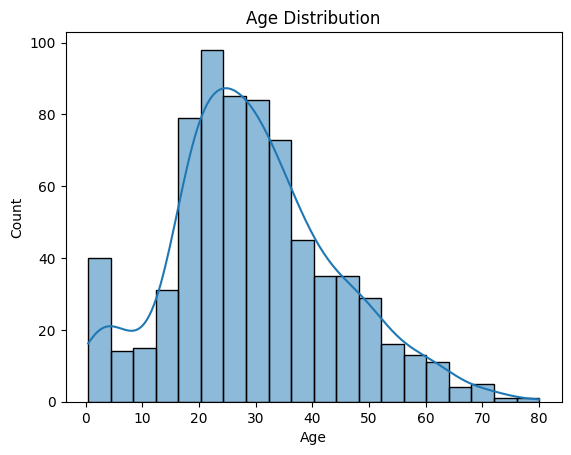

In [8]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
# observation as we can see there is skwness is rightside to imporve this using feature transformation as it has missing values and not that much skwed so we ckeck this adter removig outliers

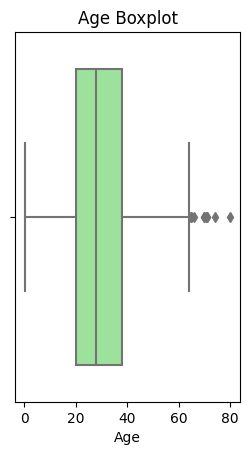

In [9]:
# box plot for age 
plt.subplot(1,2,2)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Age Boxplot')
plt.show()

# observation:
# as we can see there are some outliers after age around 62 

C:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


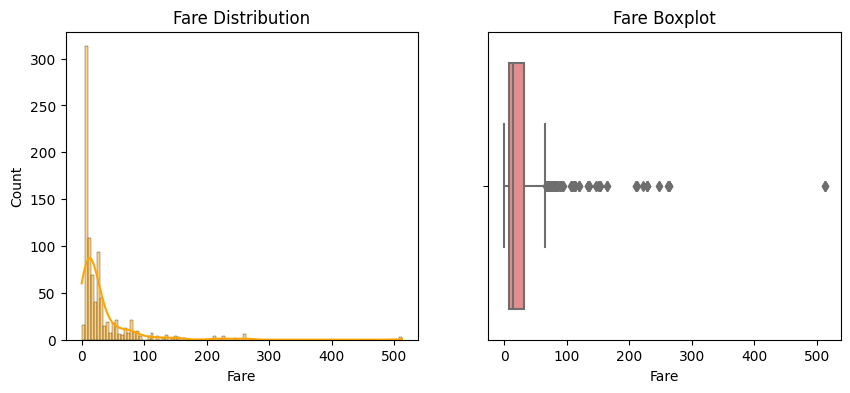

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['Fare'], kde=True, color='orange')
plt.title('Fare Distribution')

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'], color='lightcoral')
plt.title('Fare Boxplot')
plt.show()

# observation:
# Highly right-skewed , Outliers: fares > 100 we can aply apply log transform 

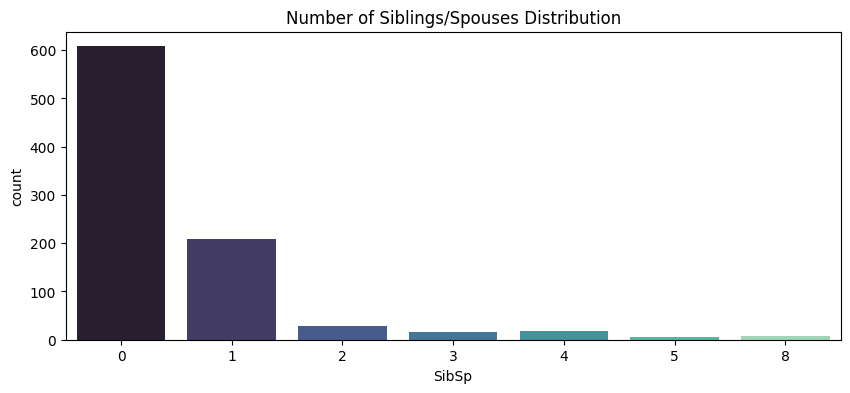

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x='SibSp', data=df, palette='mako')
plt.title('Number of Siblings/Spouses Distribution')
plt.show()

# observation:
# as we seen above that its is right skwed also most passengers had 0 or 1 sibling/spouse so outliers are 5 to 8


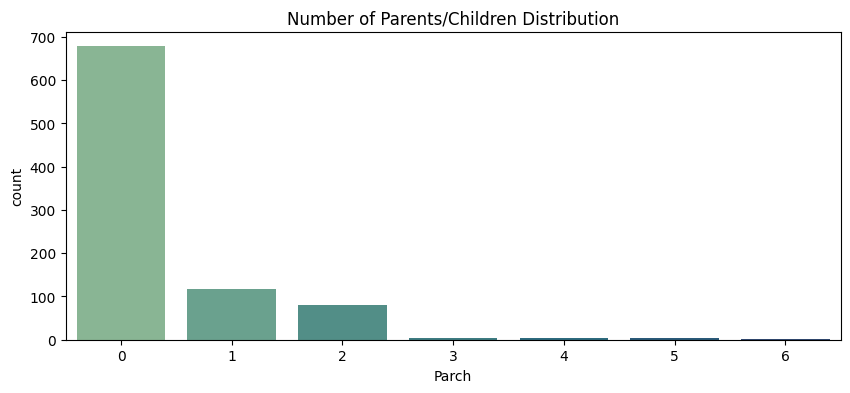

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x='Parch', data=df, palette='crest')
plt.title('Number of Parents/Children Distribution')
plt.show()

# observation:
# Most had no parents/children traveled with them means most peoples travelled alone
# Few large families so outliers at 4 to 6


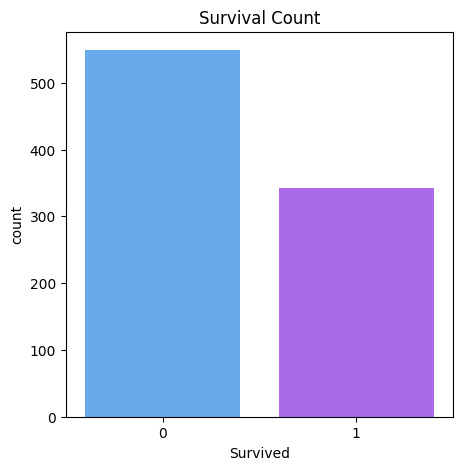

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', data=df, palette='cool')
plt.title('Survival Count')
plt.show()
# Observation:
# around 38% survived (as seen earlier).

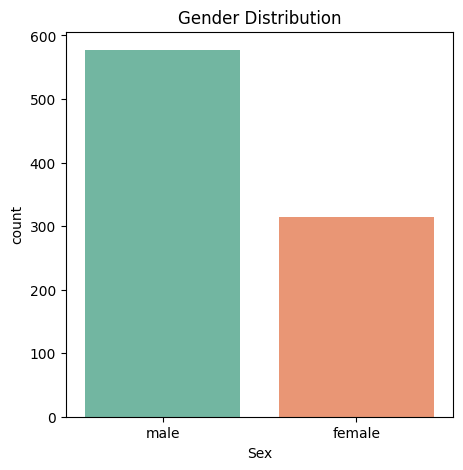

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# obsercvation
# more number of males than females

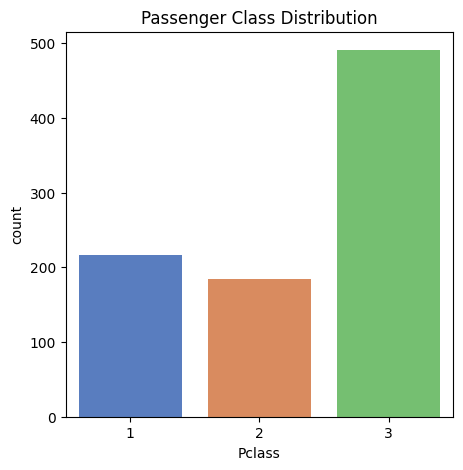

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title('Passenger Class Distribution')
plt.show()

# observation more number of peoples in 3rd class

# Bivariate analysis

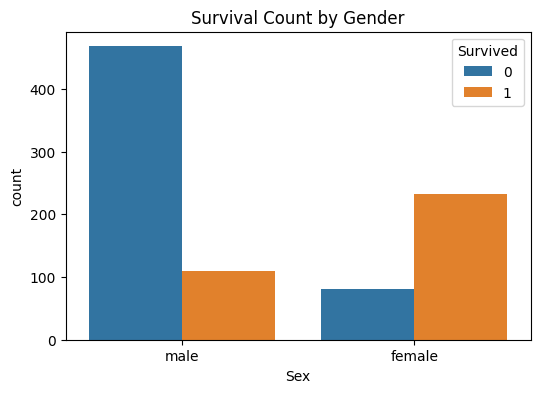

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()
# Observation:
# Women had much higher survival rate than men — clear class imbalance by gender.

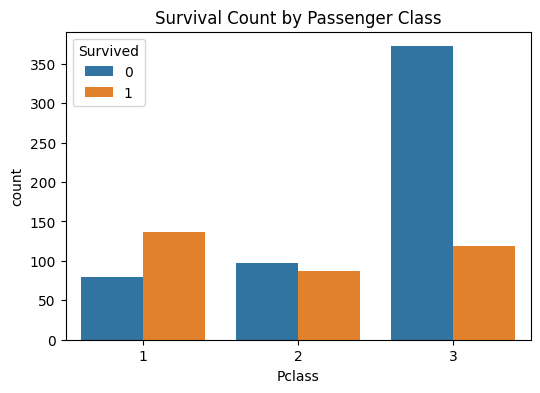

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Observation:
# Higher class (1st class) passengers survived more often — economic status affected survival.

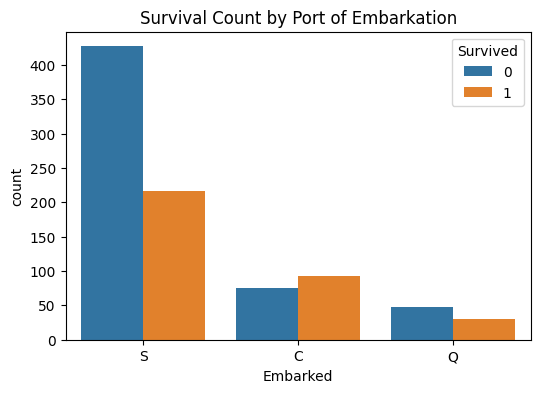

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Port of Embarkation')
plt.show()
# Observation:
# People boarding from  C (Cherbourg) survived more — maybe because many 1st class passengers boarded there.

C:\Users\BAPS\AppData\Local\Temp\ipykernel_14264\3506804030.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age', hue='Survived', data=df, shade=True)
C:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BAPS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


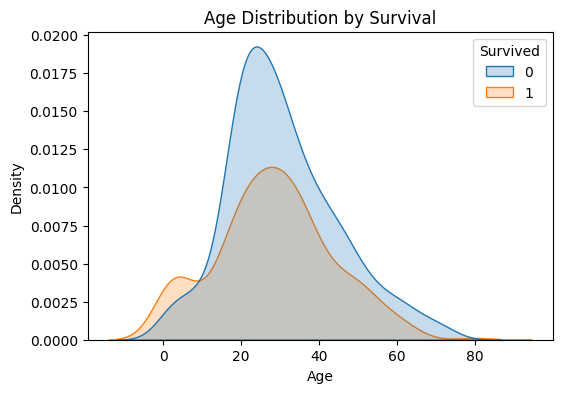

In [19]:
plt.figure(figsize=(6,4))
sns.kdeplot(x='Age', hue='Survived', data=df, shade=True)
plt.title('Age Distribution by Survival')
plt.show()
# Observation:
# Young children had higher survival probability; older passengers less so.
# blue curve is taller around older ages, it means non-survivors were older.

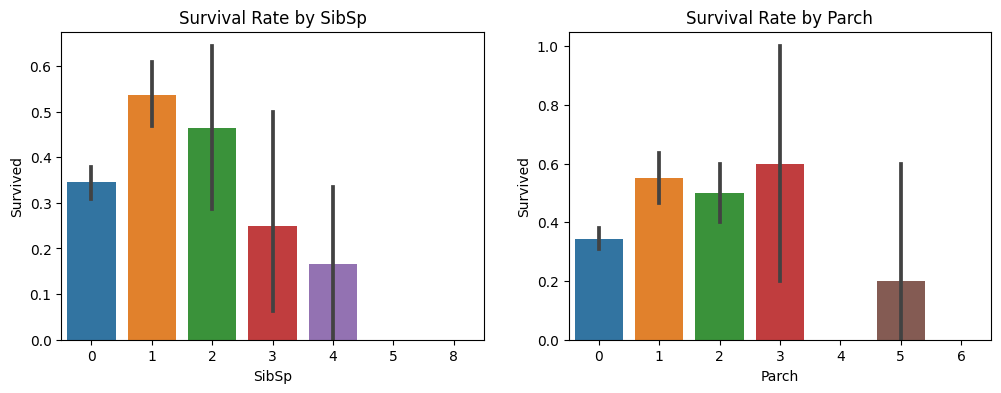

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='SibSp', y='Survived', data=df, ax=ax[0])
sns.barplot(x='Parch', y='Survived', data=df, ax=ax[1])
ax[0].set_title('Survival Rate by SibSp')
ax[1].set_title('Survival Rate by Parch')
plt.show()

# Observation:
# Passengers with 1–2 relatives had better survival; too many relatives reduced chance (difficulty escaping together).

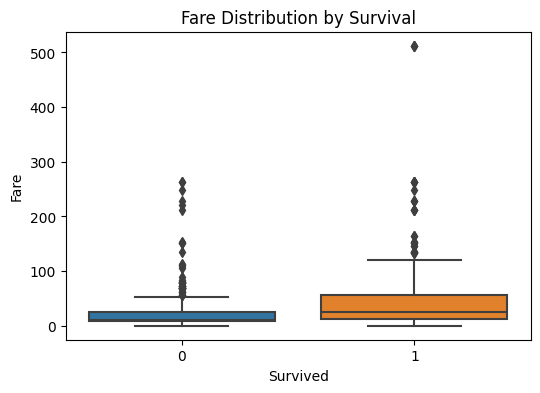

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

#observation
# more fare more survival rate


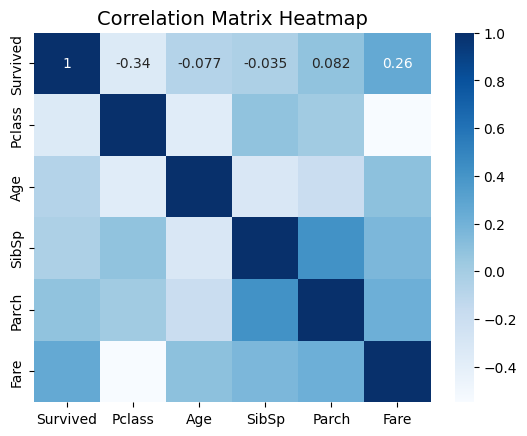

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Blues', annot=True)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()



In [23]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
